<div style="text-align: center"> Ahmed Gurbuz | SMU Bootcamp </div>

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Loading files
mouse_drug_data_to_load = r"C:\Users\AG\Documents\SMU_Assignments\Unit_05_Matplotlib\Pymaceuticals\data\mouse_drug_data.csv"
clinical_trial_data_to_load = r"C:\Users\AG\Documents\SMU_Assignments\Unit_05_Matplotlib\Pymaceuticals\data\clinicaltrial_data.csv"

In [2]:
# Read the Mouse and Drug Data 
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)

# Read the Clinical Trial Data
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

In [3]:
# Combine the data into a single dataset
# Merge two dataframes using a left join
df = pd.merge(clinical_trial_data, mouse_drug_data, on ="Mouse ID", how="left")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_timepoint = df.groupby(["Drug", "Timepoint"])
tumor_mean = drug_timepoint["Tumor Volume (mm3)"].mean()

# Create DataFrame 
df_tumor_mean = pd.DataFrame(tumor_mean)

# Drop index
df_tumor_mean.reset_index(inplace = True)

# Preview DataFrame
df_tumor_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = drug_timepoint["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
df_tumor_sem = pd.DataFrame(tumor_sem)
df_tumor_sem.reset_index(inplace=True)

# Preview DataFrame
df_tumor_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
pivoted_df_tumor_mean = df_tumor_mean.pivot(index='Timepoint', columns='Drug', values = 'Tumor Volume (mm3)')
pivoted_df_tumor_sem = df_tumor_sem.pivot(index='Timepoint', columns='Drug', values = 'Tumor Volume (mm3)')

#Reset index of the Data Frames
df_t_mean = pivoted_df_tumor_mean.reset_index()
df_t_sem = pivoted_df_tumor_sem.reset_index()

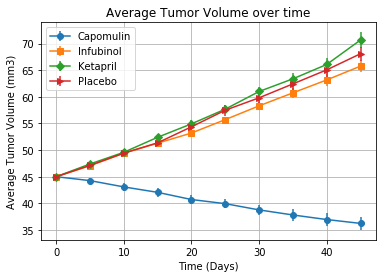

In [7]:
# Generate the Plot (with Error Bars)
plt.errorbar(df_t_mean['Timepoint'], df_t_mean['Capomulin'], marker = "o", yerr = df_t_sem['Capomulin'])
plt.errorbar(df_t_mean['Timepoint'], df_t_mean['Infubinol'], marker = "s", yerr = df_t_sem['Infubinol'])
plt.errorbar(df_t_mean['Timepoint'], df_t_mean['Ketapril'] , marker = "D", yerr = df_t_sem['Ketapril'])
plt.errorbar(df_t_mean['Timepoint'], df_t_mean['Placebo']  , marker = ">", yerr = df_t_sem['Placebo'])

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc = 'best')

plt.title("Average Tumor Volume over time")
plt.xlabel("Time (Days)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_05_Matplotlib\Pymaceuticals\plots\avg_tumor_over_time.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metas_mean = drug_timepoint["Metastatic Sites"].mean()

# Create DataFrame
df_metas_mean = pd.DataFrame(metas_mean)

#Drop index
df_metas_mean.reset_index(inplace = True)

# Preview DataFrame
df_metas_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metas_sem = drug_timepoint["Metastatic Sites"].sem()

# Convert to DataFrame
df_metas_sem = pd.DataFrame(metas_sem)

#Drop index
df_metas_sem.reset_index(inplace = True)

# Preview DataFrame
df_metas_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
pivoted_df_metas_mean = df_metas_mean.pivot(index='Timepoint', columns='Drug', values = 'Metastatic Sites')
pivoted_df_metas_sem = df_metas_sem.pivot(index='Timepoint', columns='Drug', values = 'Metastatic Sites')

#Reset index of the Data Frames
df_m_mean = pivoted_df_metas_mean.reset_index()
df_m_sem = pivoted_df_metas_sem.reset_index()

# Preview that Reformatting worked
df_m_mean.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


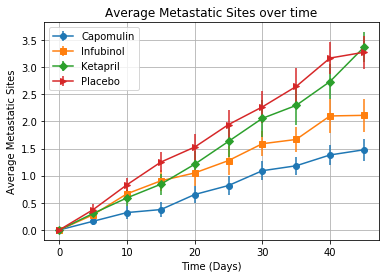

In [11]:
# Generate the Plot (with Error Bars)
plt.errorbar(df_m_mean['Timepoint'], df_m_mean['Capomulin'], marker = "o", yerr = df_m_sem['Capomulin'])
plt.errorbar(df_m_mean['Timepoint'], df_m_mean['Infubinol'], marker = "s", yerr = df_m_sem['Infubinol'])
plt.errorbar(df_m_mean['Timepoint'], df_m_mean['Ketapril'], marker = "D", yerr = df_m_sem['Ketapril'])
plt.errorbar(df_m_mean['Timepoint'], df_m_mean['Placebo'], marker = ">", yerr = df_m_sem['Placebo'])

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc = 'best')

plt.title("Average Metastatic Sites over time")
plt.xlabel("Time (Days)")
plt.ylabel("Average Metastatic Sites")
plt.grid(True)

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_05_Matplotlib\Pymaceuticals\plots\avg_metastatic_over_time.png")

# Show the Figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_mice = drug_timepoint["Mouse ID"].count()

# Create DataFrame
df_sur_mice = pd.DataFrame(survival_mice)

#Drop index
df_sur_mice.reset_index(inplace = True)

# Preview DataFrame
df_sur_mice.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
pivoted_df_sur_mice = df_sur_mice.pivot(index='Timepoint', columns='Drug', values = 'Mouse ID')

# Preview the Data Frame
pivoted_df_sur_mice.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


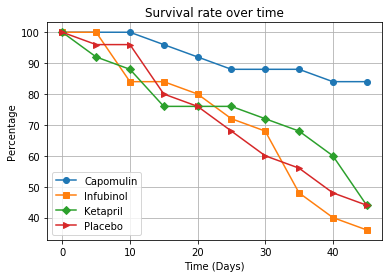

In [14]:
#Calculate percentage
df_perc = (pivoted_df_sur_mice / 25) * 100

#Drop index
df_perc.reset_index(inplace = True)

# Generate the Plot (Accounting for percentages)
plt.errorbar(df_perc['Timepoint'], df_perc['Capomulin'], marker = "o")
plt.errorbar(df_perc['Timepoint'], df_perc['Infubinol'], marker = "s")
plt.errorbar(df_perc['Timepoint'], df_perc['Ketapril'] , marker = "D")
plt.errorbar(df_perc['Timepoint'], df_perc['Placebo']  , marker = ">")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc = 'best')

plt.title("Survival rate over time")
plt.xlabel("Time (Days)")
plt.ylabel("Percentage")
plt.grid(True)

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_05_Matplotlib\Pymaceuticals\plots\survival_rate_over_time.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [15]:
#Reduce the columns 
reduced_df_t_mean = df_t_mean[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

# Calculate the percent changes for each drug
first_value = reduced_df_t_mean.iloc[0]
last_value = reduced_df_t_mean.iloc[9]
change = round((last_value - first_value) * 100 / first_value, 2)

#Drop index
df_change = pd.DataFrame(change).reset_index()

#Rename columns
df_change.rename(columns={0: "Percentage Change"}, inplace = True)

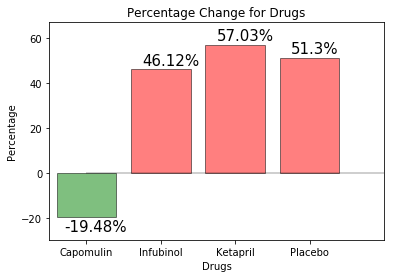

In [16]:
#Determine the condition for colors of the bars 
colors   = ['red' if (x > 0) else 'green' for x in df_change['Percentage Change']]

#Range of x axis
x_axis = np.arange(len(colors))

#Value labels for bars
labels = df_change["Percentage Change"]

#Create a bar chart 
plt.bar(x_axis, df_change["Percentage Change"], edgecolor='black', align='center', alpha=0.5, color = colors)

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, df_change["Drug"])

# Text (percentage values) on the top of each barplot
for i in range(len(x_axis)):
    if labels[i] < 0:
        plt.text(x = x_axis[i] - 0.30, y = labels[i] - 6, s = str(labels[i]) + "%", size = 15)
    else:
        plt.text(x = x_axis[i] - 0.25, y = labels[i] + 2, s = str(labels[i]) + "%", size = 15)

# Set the limits of the x axis
plt.xlim(-0.5, len(labels))

# Set the limits of the y axis
plt.ylim(min(labels)-10, max(labels)+10)

#Plot horizontal line
plt.hlines(0, 0, len(labels), alpha=0.25)

# Give the chart a title, x label, and y label
plt.title("Percentage Change for Drugs")
plt.xlabel("Drugs")
plt.ylabel("Percentage")


# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_05_Matplotlib\Pymaceuticals\plots\percentage_change_for_drugs.png")
